# Problem Statement

Five million Americans are currently living with heart diseases, and the numbers are expected to rise. It is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals. In order to understand the reasons of the Heart-attack, data was collected from various hospitals across US which is given in US_Heart_Patients.csv. In the data set, Heart-Att indicates whether the person suffered from Heart attack or not.
Perform EDA (Exploratory Data Analysis) on the data and build a model which will predict whether the person will suffer from Heart-attack or not.

Our Dataset has following variables:

1. **Gender**	        Male/Female
2. **age**             Age of the person
3. **education**       1 indicates High School, 2 indicates- Secondary School,3 indicates Graduation, 4 indicates Post Graduation
4. **currentSmoker**	1 Indicates person is a smoker and 0 indicates non- smoker
5. **cigsPerDay**    	Number of cigrattes consumed in a day
6. **BP Meds**	        1 indidates person is consuming BP medicines and 0 indicates person is not consuming BP medicines
7. **prevalentStroke**	1 indidates person had stroke in the past and 0 indicates person did not suffer from stroke in the past
8. **prevalentHyp**	1 indidates person is suffering from Hypertension  and 0 indicates person is not suffering from hypertension
9. **diabetes**	    1 indicates person is diabatic and 0 indicates person in non-diabetic
10. **tot cholesterol**	Indicates total cholesterol level in the body
11. **Systolic BP**	    Systolic BP of the person
12. **Diastolic BP**	Diastolic BP of the person
13. **BMI**	Indicates   BMI level in the body
14. **heartRate**	    Indicates body heartrate
15. **glucose**	        Glucose level of the body
16. **Heart-Att**	    1 Indicates  person suffered from Heart-attack and 0 indicates that person has not suffer from Heart-at



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')

# Import dataset

In [2]:
df=pd.read_csv("US_Heart_Patients.csv")

In [3]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [6]:
df['education'].value_counts()

1.0    1717
2.0    1252
3.0     688
4.0     473
Name: education, dtype: int64

In [7]:
df['currentSmoker'].value_counts()

0.0    2143
1.0    2094
Name: currentSmoker, dtype: int64

In [8]:
df['BP Meds'].value_counts()

0.0    4056
1.0     124
Name: BP Meds, dtype: int64

In [9]:
df['prevalentStroke'].value_counts()

0.0    4206
1.0      25
Name: prevalentStroke, dtype: int64

In [10]:
df['prevalentHyp'].value_counts()

0.0    2922
1.0    1316
Name: prevalentHyp, dtype: int64

In [11]:
df['diabetes'].value_counts()

0.0    4129
1.0     109
Name: diabetes, dtype: int64

In [12]:
df['Heart-Att'].value_counts()

0    3596
1     644
Name: Heart-Att, dtype: int64

## change the data types of the following 6 variables

In [13]:
cat=["education", "currentSmoker", "BP Meds", "prevalentStroke", "prevalentHyp","diabetes"]

In [14]:
for i in cat:
    df[i]=df[i].astype("object")

In [15]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


In [17]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


In [19]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.579283,8.572875,32.00,42.00,49.000,56.00,70.0
cigsPerDay,4209.0,9.001901,11.920742,0.00,0.00,0.000,20.00,70.0
tot cholesterol,4180.0,236.677273,44.616098,107.00,206.00,234.000,263.00,696.0
Systolic BP,4236.0,132.362370,22.039244,83.50,117.00,128.000,144.00,295.0
Diastolic BP,4235.0,82.901889,11.914467,48.00,75.00,82.000,90.00,142.5
BMI,4216.0,25.798916,4.075256,15.54,23.07,25.395,28.04,56.8
heartRate,4236.0,75.867800,11.999488,44.00,68.00,75.000,83.00,143.0
glucose,3849.0,81.951936,23.958428,40.00,71.00,78.000,87.00,394.0
Heart-Att,4240.0,0.151887,0.358953,0.00,0.00,0.000,0.00,1.0


In [20]:
df[cat].describe().T

,count,unique,top,freq
Gender,4232,2,Female,2414
education,4130.0,4.0,1.0,1717.0
currentSmoker,4237.0,2.0,0.0,2143.0
BP Meds,4180.0,2.0,0.0,4056.0
prevalentStroke,4231.0,2.0,0.0,4206.0
prevalentHyp,4238.0,2.0,0.0,2922.0
diabetes,4238.0,2.0,0.0,4129.0


In [21]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column.upper(), ":",df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER : 2
Male      1818
Female    2414
Name: Gender, dtype: int64


EDUCATION : 4
4.0     473
3.0     688
2.0    1252
1.0    1717
Name: education, dtype: int64


CURRENTSMOKER : 2
1.0    2094
0.0    2143
Name: currentSmoker, dtype: int64


BP MEDS : 2
1.0     124
0.0    4056
Name: BP Meds, dtype: int64


PREVALENTSTROKE : 2
1.0      25
0.0    4206
Name: prevalentStroke, dtype: int64


PREVALENTHYP : 2
1.0    1316
0.0    2922
Name: prevalentHyp, dtype: int64


DIABETES : 2
1.0     109
0.0    4129
Name: diabetes, dtype: int64




In [22]:
#Missing Values
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [24]:
dups = df.duplicated()
print('Number of duplicate rows = %d' %(dups.sum()))
df[dups]

Number of duplicate rows = 0


,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att


In [25]:
#Rename columns to remove space before we impute
df.rename(columns={"BP Meds":"BP_Meds","tot cholesterol":"tot_cholesterol","Systolic BP":"Systolic_BP","Diastolic BP":"Diastolic_BP"},inplace=True)

In [26]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP_Meds,prevalentStroke,prevalentHyp,diabetes,tot_cholesterol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [27]:
df.Gender.mode()

0    Female
Name: Gender, dtype: object

In [28]:
df.Gender=df.Gender.fillna("Female")

In [29]:
for column in ['education', 'currentSmoker','BP_Meds','prevalentStroke','prevalentHyp','diabetes']:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [30]:
cat1 = ['education', 'currentSmoker','BP_Meds','prevalentStroke','prevalentHyp','diabetes']

In [31]:
for i in cat1:
    df[i]=df[i].astype("object")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   object 
 1   age              4238 non-null   float64
 2   education        4240 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP_Meds          4240 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   tot_cholesterol  4180 non-null   float64
 10  Systolic_BP      4236 non-null   float64
 11  Diastolic_BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


In [33]:
impute=['age','cigsPerDay','tot_cholesterol','Systolic_BP','Diastolic_BP','BMI','heartRate','glucose']

In [35]:
#import the KNNimputer class
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [39]:
for i in impute:
    df[[i]]=imputer.fit_transform(df[[i]])

In [40]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP_Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot_cholesterol    0
Systolic_BP        0
Diastolic_BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

In [41]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column.upper(), ":",df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER : 2
Male      1818
Female    2422
Name: Gender, dtype: int64


EDUCATION : 4
4.0     473
3.0     688
2.0    1252
1.0    1827
Name: education, dtype: int64


CURRENTSMOKER : 2
1.0    2094
0.0    2146
Name: currentSmoker, dtype: int64


BP_MEDS : 2
1.0     124
0.0    4116
Name: BP_Meds, dtype: int64


PREVALENTSTROKE : 2
1.0      25
0.0    4215
Name: prevalentStroke, dtype: int64


PREVALENTHYP : 2
1.0    1316
0.0    2924
Name: prevalentHyp, dtype: int64


DIABETES : 2
1.0     109
0.0    4131
Name: diabetes, dtype: int64




In [42]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Gender', 'education', 'currentSmoker', 'BP_Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'tot_cholesterol', 'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


# Univariate Analysis

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_19232\2140010961.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a=sns.distplot(df['age'], ax=axes[0][0],bins=5)
C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_19232\2140010961.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a=sns.distplot(df['cigsPerDay'], ax=

Text(0.5, 1.0, 'Systolic_BP Boxplot')

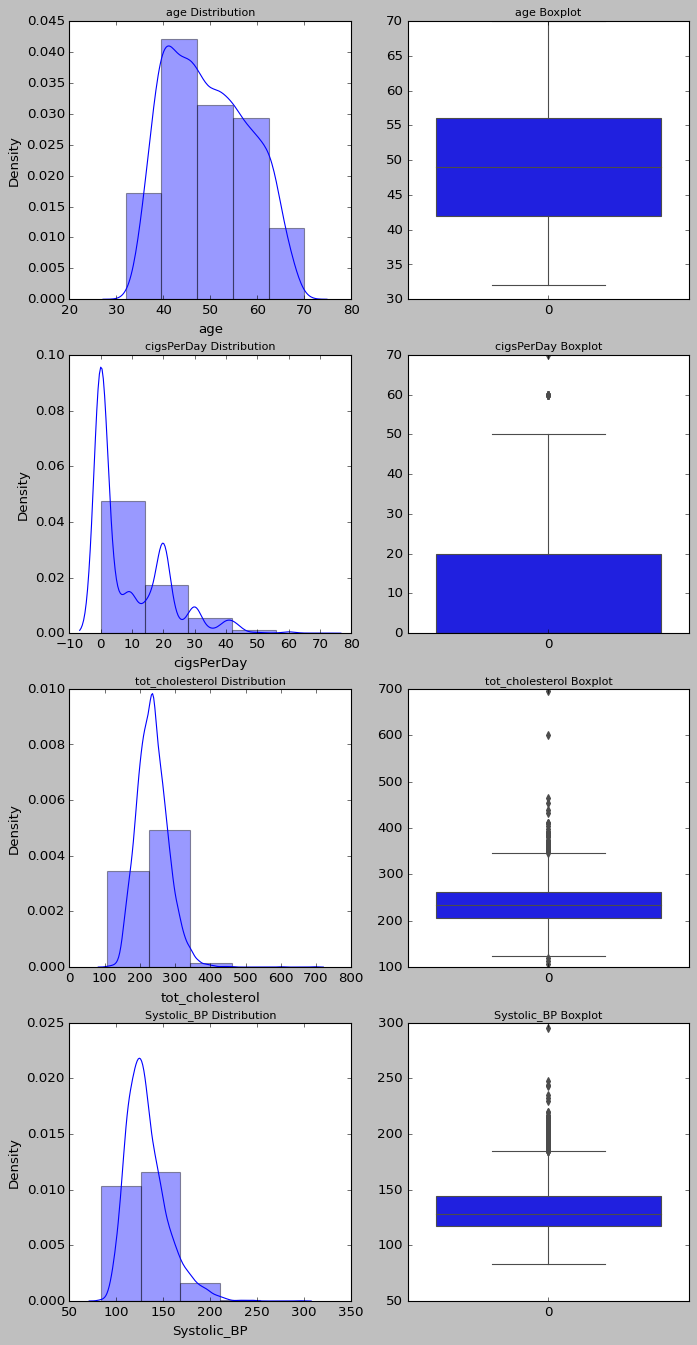

In [45]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a=sns.distplot(df['age'], ax=axes[0][0],bins=5)
a.set_title("age Distribution",fontsize=10)

a=sns.boxplot(df['age'],orient='v',ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(df['cigsPerDay'], ax=axes[1][0],bins=5)
a.set_title("cigsPerDay Distribution",fontsize=10)

a=sns.boxplot(df['cigsPerDay'],orient='v',ax=axes[1][1])
a.set_title("cigsPerDay Boxplot",fontsize=10)

a=sns.distplot(df['tot_cholesterol'], ax=axes[2][0],bins=5)
a.set_title("tot_cholesterol Distribution",fontsize=10)

a=sns.boxplot(df['tot_cholesterol'],orient='v',ax=axes[2][1])
a.set_title("tot_cholesterol Boxplot",fontsize=10)

a=sns.distplot(df['Systolic_BP'], ax=axes[3][0],bins=5)
a.set_title("Systolic_BP Distribution",fontsize=10)

a=sns.boxplot(df['Systolic_BP'],orient='v',ax=axes[3][1])
a.set_title("Systolic_BP Boxplot",fontsize=10)

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_19232\748796069.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a=sns.distplot(df['Diastolic_BP'], ax=axes[0][0],bins=5)
C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_19232\748796069.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a=sns.distplot(df['BMI'], ax=

Text(0.5, 1.0, 'glucose Boxplot')

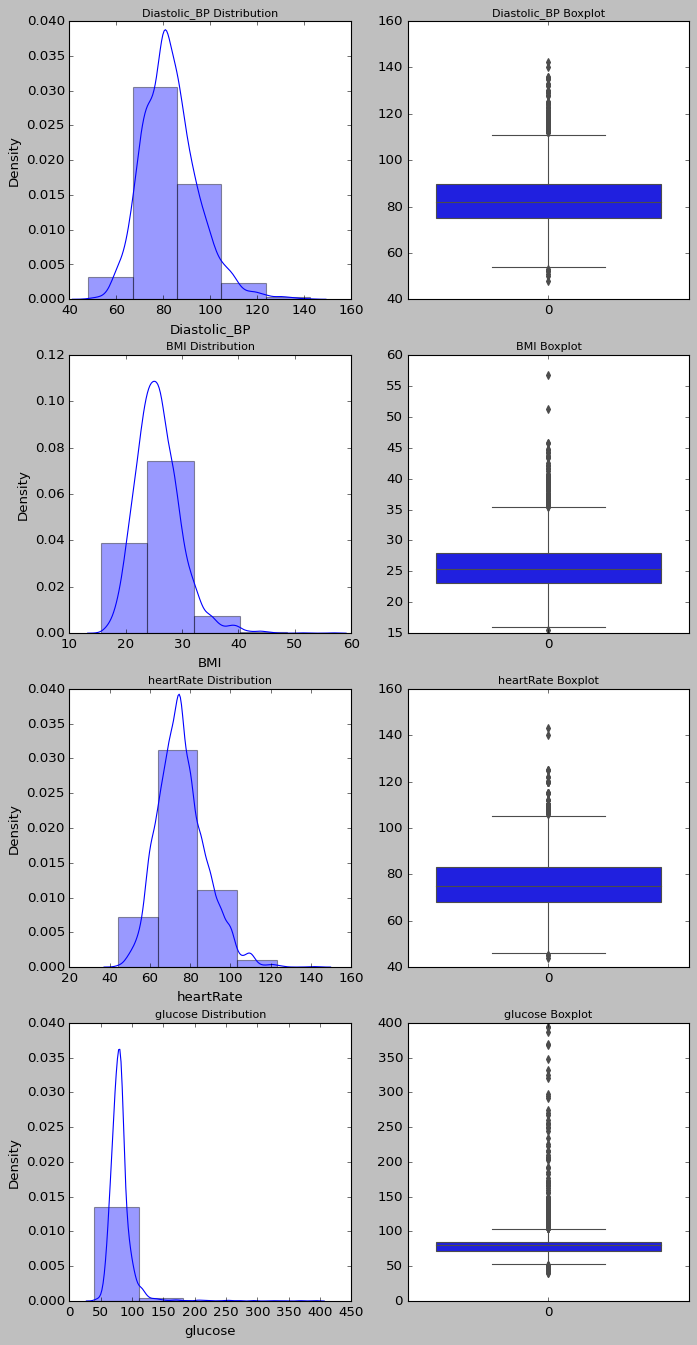

In [46]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a=sns.distplot(df['Diastolic_BP'], ax=axes[0][0],bins=5)
a.set_title("Diastolic_BP Distribution",fontsize=10)

a=sns.boxplot(df['Diastolic_BP'],orient='v',ax=axes[0][1])
a.set_title("Diastolic_BP Boxplot",fontsize=10)

a=sns.distplot(df['BMI'], ax=axes[1][0],bins=5)
a.set_title("BMI Distribution",fontsize=10)

a=sns.boxplot(df['BMI'],orient='v',ax=axes[1][1])
a.set_title("BMI Boxplot",fontsize=10)

a=sns.distplot(df['heartRate'], ax=axes[2][0],bins=5)
a.set_title("heartRate Distribution",fontsize=10)

a=sns.boxplot(df['heartRate'],orient='v',ax=axes[2][1])
a.set_title("heartRate Boxplot",fontsize=10)

a=sns.distplot(df['glucose'], ax=axes[3][0],bins=5)
a.set_title("glucose Distribution",fontsize=10)

a=sns.boxplot(df['glucose'],orient='v',ax=axes[3][1])
a.set_title("glucose Boxplot",fontsize=10)

## Bivariate Analysis

In [47]:
print(num)

['age', 'cigsPerDay', 'tot_cholesterol', 'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


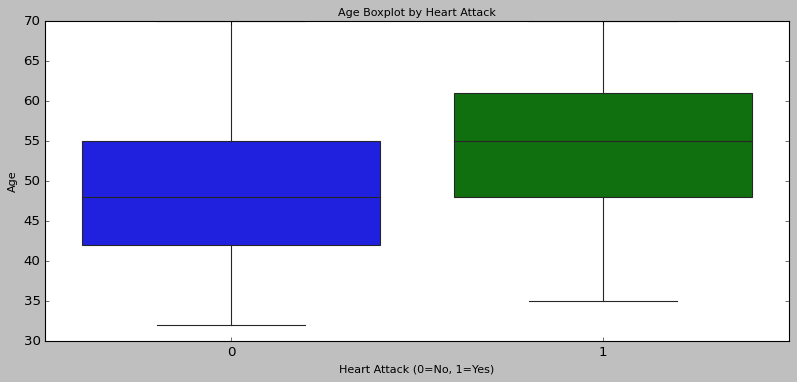

In [48]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df["Heart-Att"],y=df['age'])
plt.title("Age Boxplot by Heart Attack",fontsize=10)
plt.xlabel("Heart Attack (0=No, 1=Yes)",fontsize=10)
plt.ylabel("Age",fontsize=10)
plt.show()

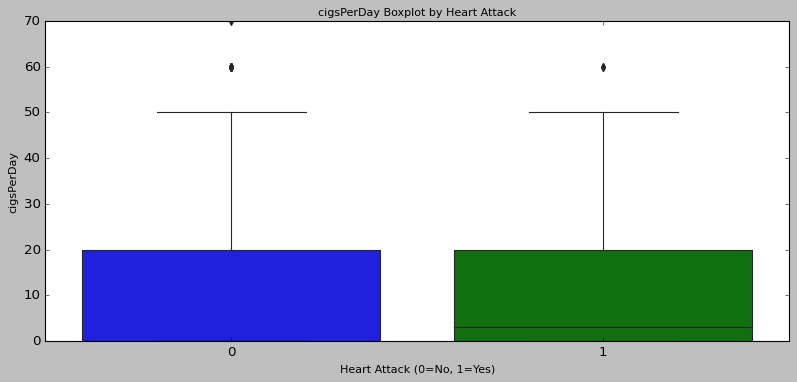

In [49]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df["Heart-Att"],y=df['cigsPerDay'])
plt.title("cigsPerDay Boxplot by Heart Attack",fontsize=10)
plt.xlabel("Heart Attack (0=No, 1=Yes)",fontsize=10)
plt.ylabel("cigsPerDay",fontsize=10)
plt.show()

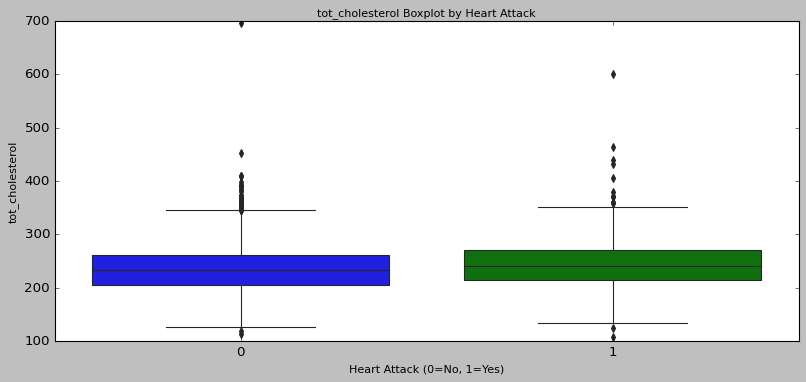

In [50]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df["Heart-Att"],y=df['tot_cholesterol'])
plt.title("tot_cholesterol Boxplot by Heart Attack",fontsize=10)
plt.xlabel("Heart Attack (0=No, 1=Yes)",fontsize=10)
plt.ylabel("tot_cholesterol",fontsize=10)
plt.show()

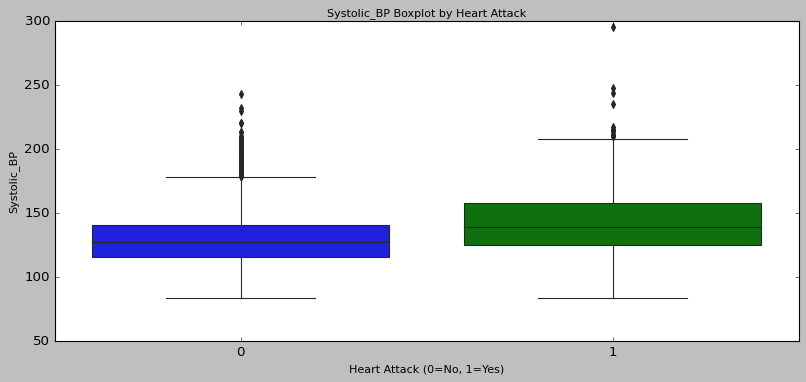

In [51]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df["Heart-Att"],y=df['Systolic_BP'])
plt.title("Systolic_BP Boxplot by Heart Attack",fontsize=10)
plt.xlabel("Heart Attack (0=No, 1=Yes)",fontsize=10)
plt.ylabel("Systolic_BP",fontsize=10)
plt.show()

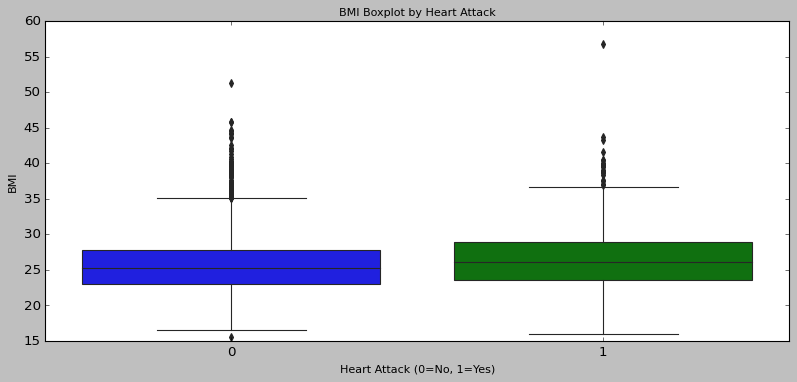

In [52]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df["Heart-Att"],y=df['BMI'])
plt.title("BMI Boxplot by Heart Attack",fontsize=10)
plt.xlabel("Heart Attack (0=No, 1=Yes)",fontsize=10)
plt.ylabel("BMI",fontsize=10)
plt.show()

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_19232\3113708844.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


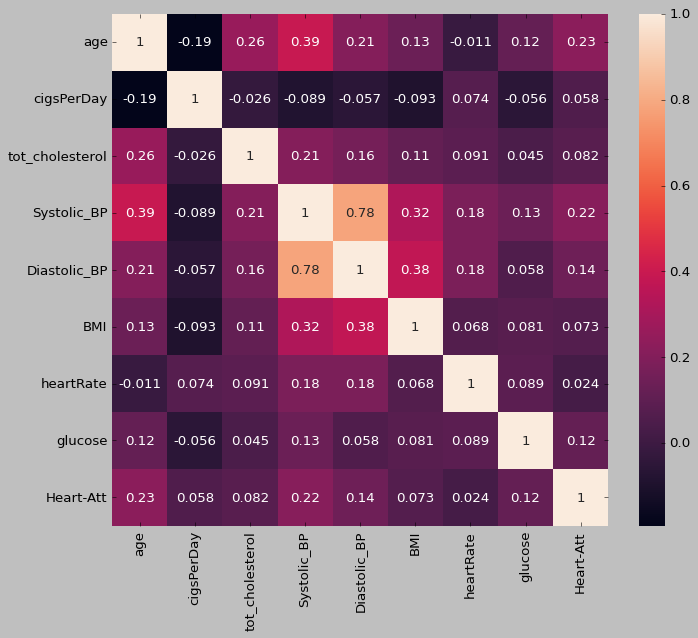

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [54]:
#Since Systolic_BP is highly correlated to Diastolic_BP, we are ok dropping one
df.drop(['Systolic_BP'],axis=1,inplace=True)

In [55]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP_Meds,prevalentStroke,prevalentHyp,diabetes,tot_cholesterol,Diastolic_BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,84.0,23.10,85.0,85.0,0


In [56]:
print(cat)

['Gender', 'education', 'currentSmoker', 'BP_Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [57]:
df=pd.get_dummies(df,columns=cat,drop_first=True)

C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_19232\3859916513.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df=pd.get_dummies(df,columns=cat,drop_first=True)


In [58]:
df.head()

,age,cigsPerDay,tot_cholesterol,Diastolic_BP,BMI,heartRate,glucose,Heart-Att,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BP_Meds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
0,39.0,0.0,195.0,70.0,26.97,80.0,77.0,0,1,0,0,1,0,0,0,0,0
1,46.0,0.0,250.0,81.0,28.73,95.0,76.0,0,0,1,0,0,0,0,0,0,0
2,48.0,20.0,245.0,80.0,25.34,75.0,70.0,0,1,0,0,0,1,0,0,0,0
3,61.0,30.0,225.0,95.0,28.58,65.0,103.0,1,0,0,1,0,1,0,0,1,0
4,46.0,23.0,285.0,84.0,23.10,85.0,85.0,0,0,0,1,0,1,0,0,0,0


In [59]:
df.shape

(4240, 17)

# Outlier checks

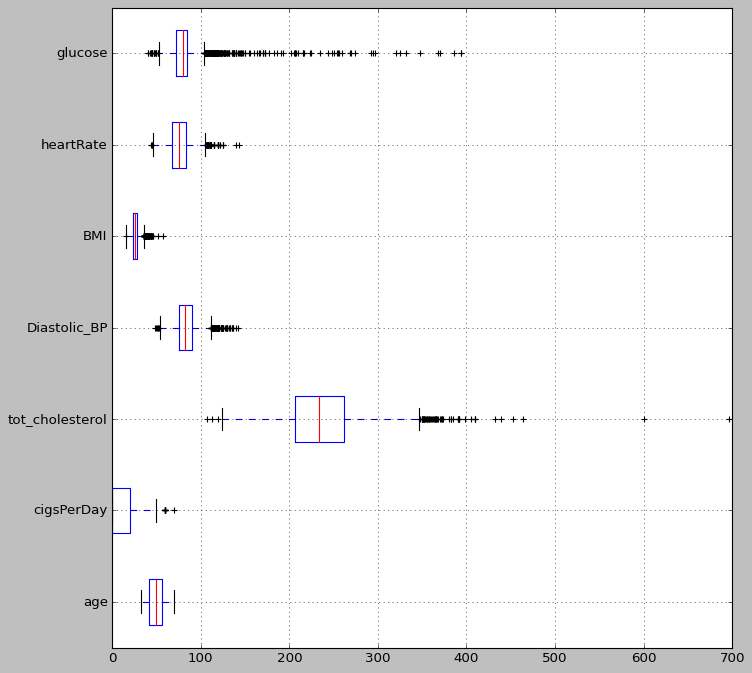

In [60]:
plt.figure(figsize=(10,10))
df.iloc[:,:7].boxplot(vert=0)
plt.show()

# Outlier Treatment

In [63]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [64]:
for column in df.iloc[:,:7].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

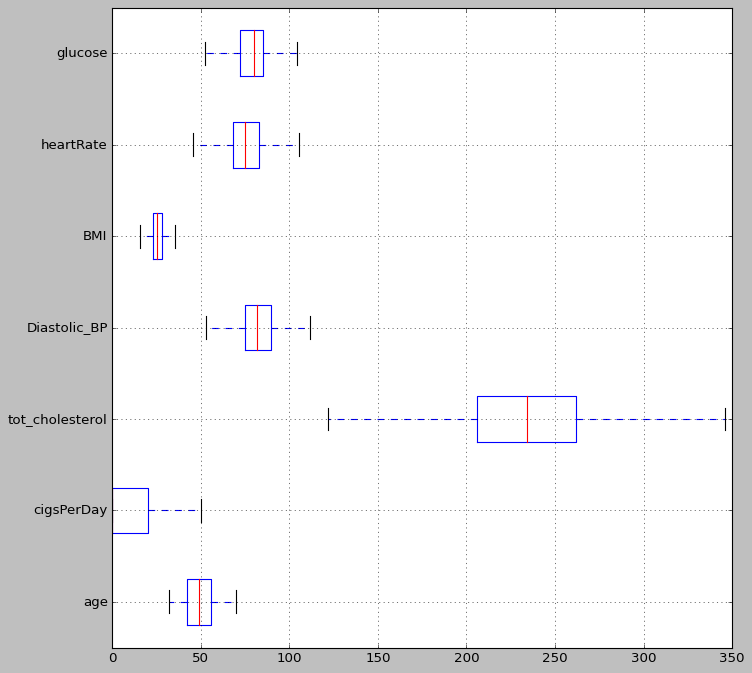

In [65]:
plt.figure(figsize=(10,10))
df.iloc[:,:7].boxplot(vert=0)
plt.show()

In [66]:
print(num)

['age', 'cigsPerDay', 'tot_cholesterol', 'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']


In [67]:
num1=['age','cigsPerDay','tot_cholesterol','Diastolic_BP','BMI','heartRate','glucose']

In [68]:
df[num1]=df[num1].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [69]:
df.head()

,age,cigsPerDay,tot_cholesterol,Diastolic_BP,BMI,heartRate,glucose,Heart-Att,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BP_Meds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
0,0.184211,0.00,0.325893,0.289530,0.571862,0.575000,0.471154,0,1,0,0,1,0,0,0,0,0
1,0.368421,0.00,0.571429,0.477564,0.660931,0.825000,0.451923,0,0,1,0,0,0,0,0,0,0
2,0.421053,0.40,0.549107,0.460470,0.489372,0.491667,0.336538,0,1,0,0,0,1,0,0,0,0
3,0.763158,0.60,0.459821,0.716880,0.653340,0.325000,0.971154,1,0,0,1,0,1,0,0,1,0
4,0.368421,0.46,0.727679,0.528846,0.376012,0.658333,0.625000,0,0,0,1,0,1,0,0,0,0


In [70]:
df.columns

Index(['age', 'cigsPerDay', 'tot_cholesterol', 'Diastolic_BP', 'BMI',
       'heartRate', 'glucose', 'Heart-Att', 'Gender_Male', 'education_2.0',
       'education_3.0', 'education_4.0', 'currentSmoker_1.0', 'BP_Meds_1.0',
       'prevalentStroke_1.0', 'prevalentHyp_1.0', 'diabetes_1.0'],
      dtype='object')

In [71]:
X=df.drop('Heart-Att',axis=1)

y=df['Heart-Att']

In [72]:
X.head()

,age,cigsPerDay,tot_cholesterol,Diastolic_BP,BMI,heartRate,glucose,Gender_Male,education_2.0,education_3.0,education_4.0,currentSmoker_1.0,BP_Meds_1.0,prevalentStroke_1.0,prevalentHyp_1.0,diabetes_1.0
0,0.184211,0.00,0.325893,0.289530,0.571862,0.575000,0.471154,1,0,0,1,0,0,0,0,0
1,0.368421,0.00,0.571429,0.477564,0.660931,0.825000,0.451923,0,1,0,0,0,0,0,0,0
2,0.421053,0.40,0.549107,0.460470,0.489372,0.491667,0.336538,1,0,0,0,1,0,0,0,0
3,0.763158,0.60,0.459821,0.716880,0.653340,0.325000,0.971154,0,0,1,0,1,0,0,1,0
4,0.368421,0.46,0.727679,0.528846,0.376012,0.658333,0.625000,0,0,1,0,1,0,0,0,0


In [73]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Heart-Att, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

# Naive Bayes Model 

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [76]:
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [79]:
y_train_predict=NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8314465408805032
[[2571  127]
 [ 409   73]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      2698
           1       0.36      0.15      0.21       482

    accuracy                           0.83      3180
   macro avg       0.61      0.55      0.56      3180
weighted avg       0.79      0.83      0.80      3180



In [80]:
y_test_predict=NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8311320754716981
[[853  45]
 [134  28]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       898
           1       0.38      0.17      0.24       162

    accuracy                           0.83      1060
   macro avg       0.62      0.56      0.57      1060
weighted avg       0.79      0.83      0.80      1060



# Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
Log_model=LogisticRegression()
Log_model.fit(X_train, y_train)

LogisticRegression()

In [84]:
y_train_predict=Log_model.predict(X_train)
model_score = Log_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8528301886792453
[[2690    8]
 [ 460   22]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2698
           1       0.73      0.05      0.09       482

    accuracy                           0.85      3180
   macro avg       0.79      0.52      0.50      3180
weighted avg       0.84      0.85      0.79      3180



In [85]:
y_test_predict=Log_model.predict(X_test)
model_score = Log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8509433962264151
[[897   1]
 [157   5]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       898
           1       0.83      0.03      0.06       162

    accuracy                           0.85      1060
   macro avg       0.84      0.51      0.49      1060
weighted avg       0.85      0.85      0.79      1060



In [87]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
y_train_predict=KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8591194968553459
[[2651   47]
 [ 401   81]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2698
           1       0.63      0.17      0.27       482

    accuracy                           0.86      3180
   macro avg       0.75      0.58      0.59      3180
weighted avg       0.83      0.86      0.82      3180



In [89]:
y_test_predict=KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8339622641509434
[[876  22]
 [154   8]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       898
           1       0.27      0.05      0.08       162

    accuracy                           0.83      1060
   macro avg       0.56      0.51      0.50      1060
weighted avg       0.76      0.83      0.78      1060



In [95]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=5,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=1)

In [96]:
y_train_predict=RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.970754716981132
[[2688   10]
 [  83  399]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2698
           1       0.98      0.83      0.90       482

    accuracy                           0.97      3180
   macro avg       0.97      0.91      0.94      3180
weighted avg       0.97      0.97      0.97      3180



In [97]:
y_test_predict=RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8207547169811321
[[849  49]
 [141  21]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       898
           1       0.30      0.13      0.18       162

    accuracy                           0.82      1060
   macro avg       0.58      0.54      0.54      1060
weighted avg       0.77      0.82      0.79      1060



In [98]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'